In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.drop('Unnamed: 0',axis=1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [6]:
df.shape

(300153, 12)

In [7]:
df1 = df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

/var/folders/ss/rmrlnxpj5tq8_tq9mvtbtyxh0000gp/T/ipykernel_21464/130475741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df1['airline'],palette='hls')


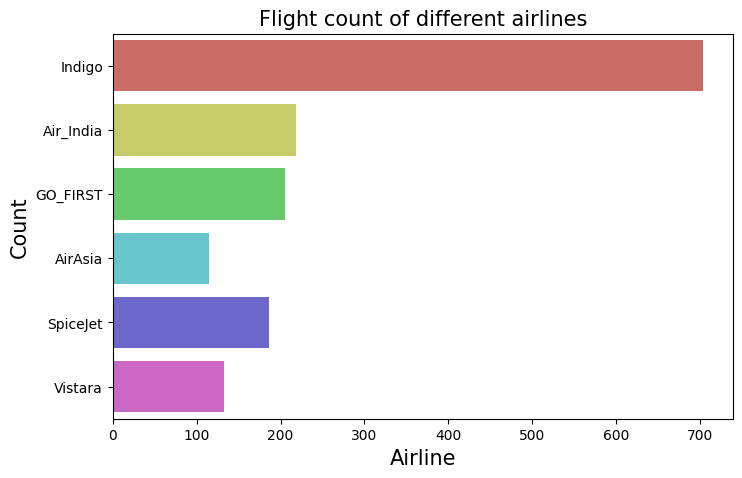

In [8]:
## Indigo becoming as a popular airline
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flight count of different airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [9]:
df2 = df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

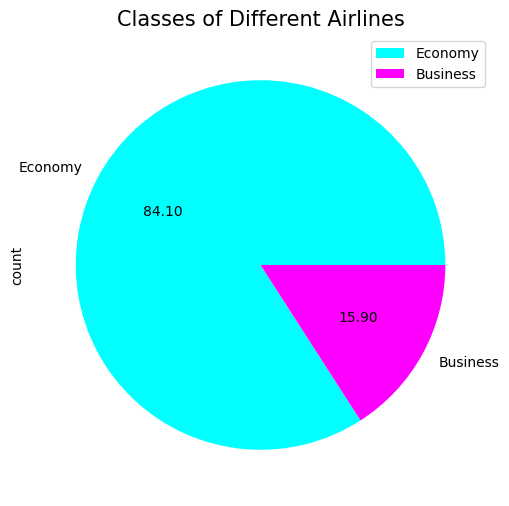

In [10]:
## Most of the airlines has Economy class as common
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

/var/folders/ss/rmrlnxpj5tq8_tq9mvtbtyxh0000gp/T/ipykernel_21464/4137896173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['airline'],y=df['price'],palette='hls')


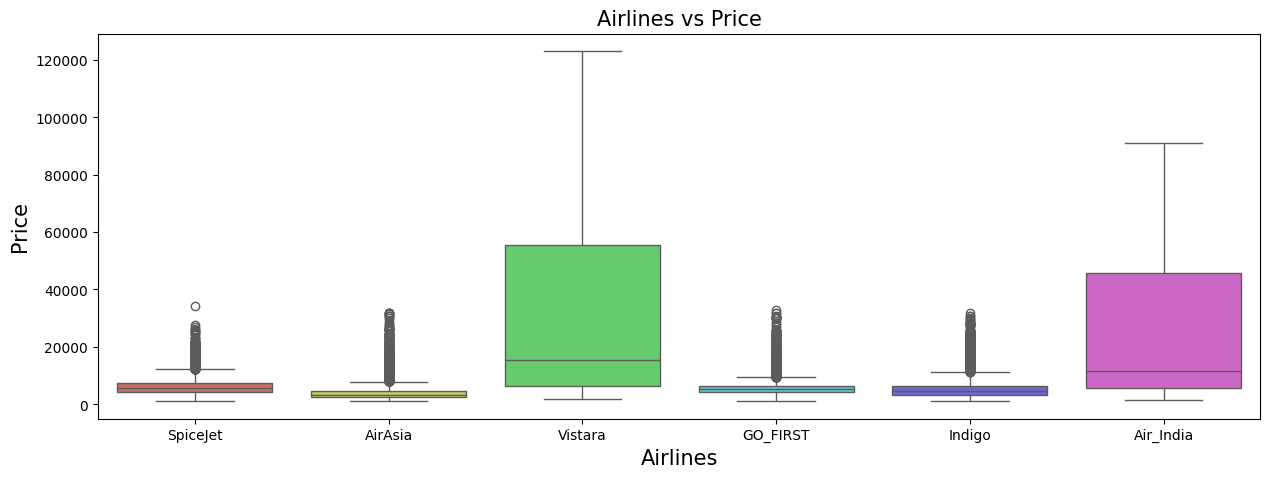

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines vs Price',fontsize=15)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

/var/folders/ss/rmrlnxpj5tq8_tq9mvtbtyxh0000gp/T/ipykernel_21464/1407121350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['class'],y=df['price'],data=df,palette='hls')


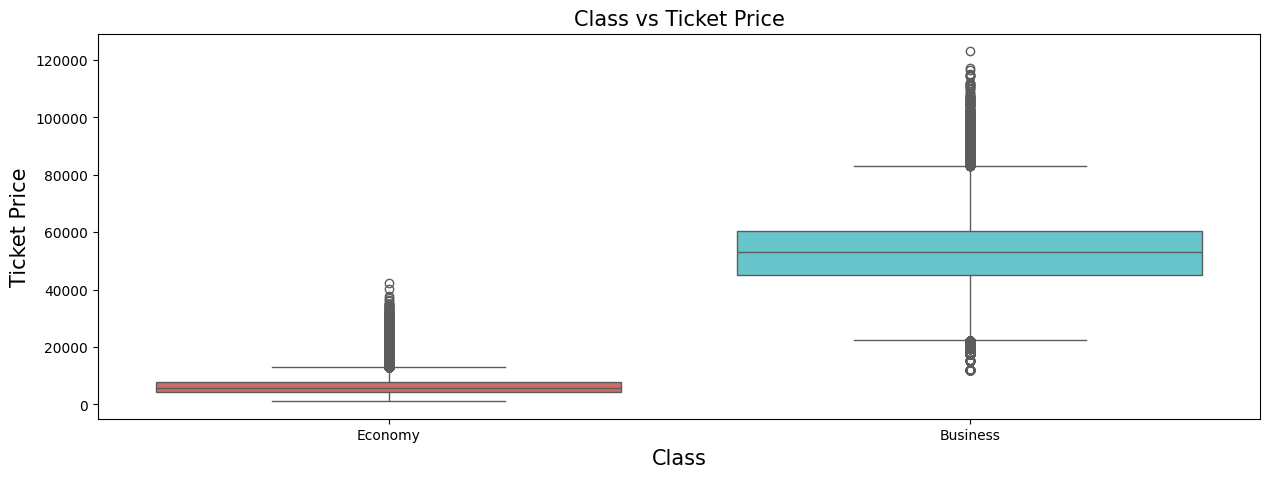

In [12]:
## Ticket price is maximum for business class when compared to economy class
plt.figure(figsize=(15,5))
sns.boxplot(x=df['class'],y=df['price'],data=df,palette='hls')
plt.title('Class vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Ticket Price',fontsize=15)
plt.show()

/var/folders/ss/rmrlnxpj5tq8_tq9mvtbtyxh0000gp/T/ipykernel_21464/4245628187.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['stops'],y=df['price'],palette='hls')


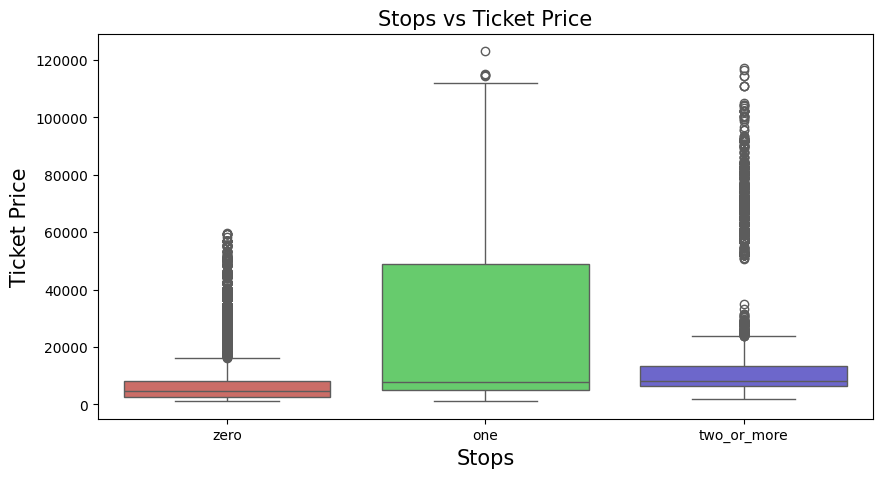

In [13]:
## Flight having one stop has maximum price
plt.figure(figsize=(10,5))
sns.boxplot(x=df['stops'],y=df['price'],palette='hls')
plt.title('Stops vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Ticket Price',fontsize=15)
plt.show()

/var/folders/ss/rmrlnxpj5tq8_tq9mvtbtyxh0000gp/T/ipykernel_21464/284087209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['source_city'],y=df['price'],palette='hls')
/var/folders/ss/rmrlnxpj5tq8_tq9mvtbtyxh0000gp/T/ipykernel_21464/284087209.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['destination_city'],y=df['price'],palette='hls')


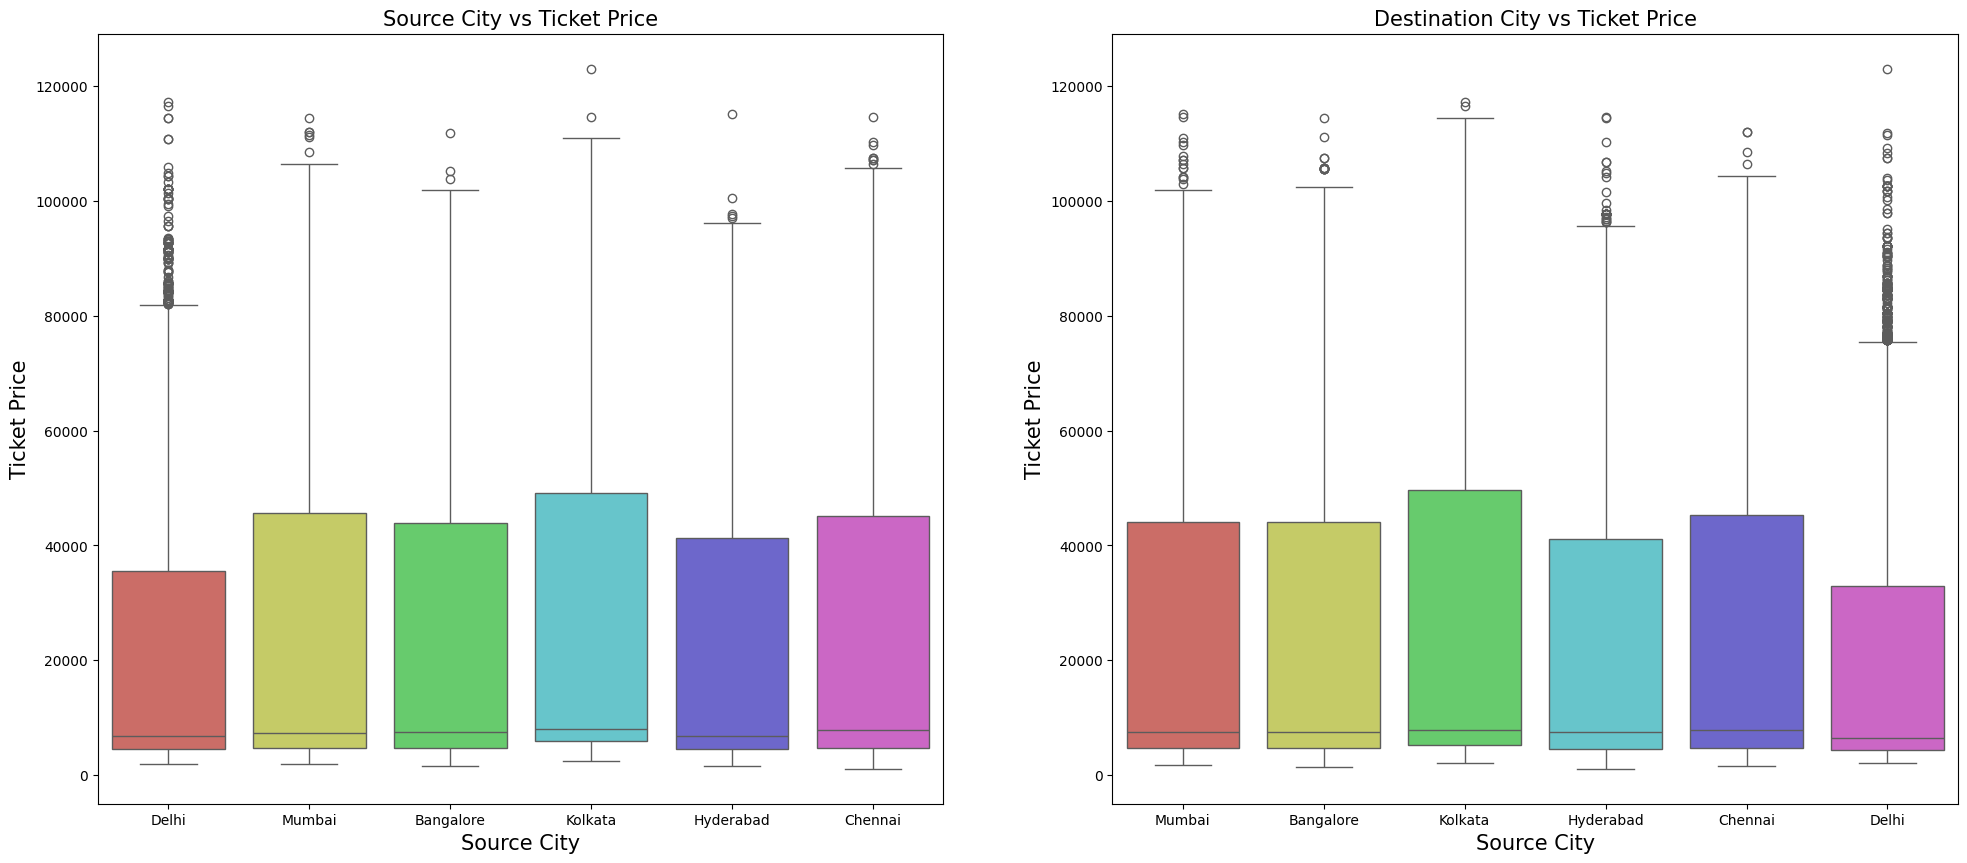

In [14]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x=df['source_city'],y=df['price'],palette='hls')
plt.title('Source City vs Ticket Price',fontsize=15)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Ticket Price',fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(x=df['destination_city'],y=df['price'],palette='hls')
plt.title('Destination City vs Ticket Price',fontsize=15)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Ticket Price',fontsize=15)
plt.show()

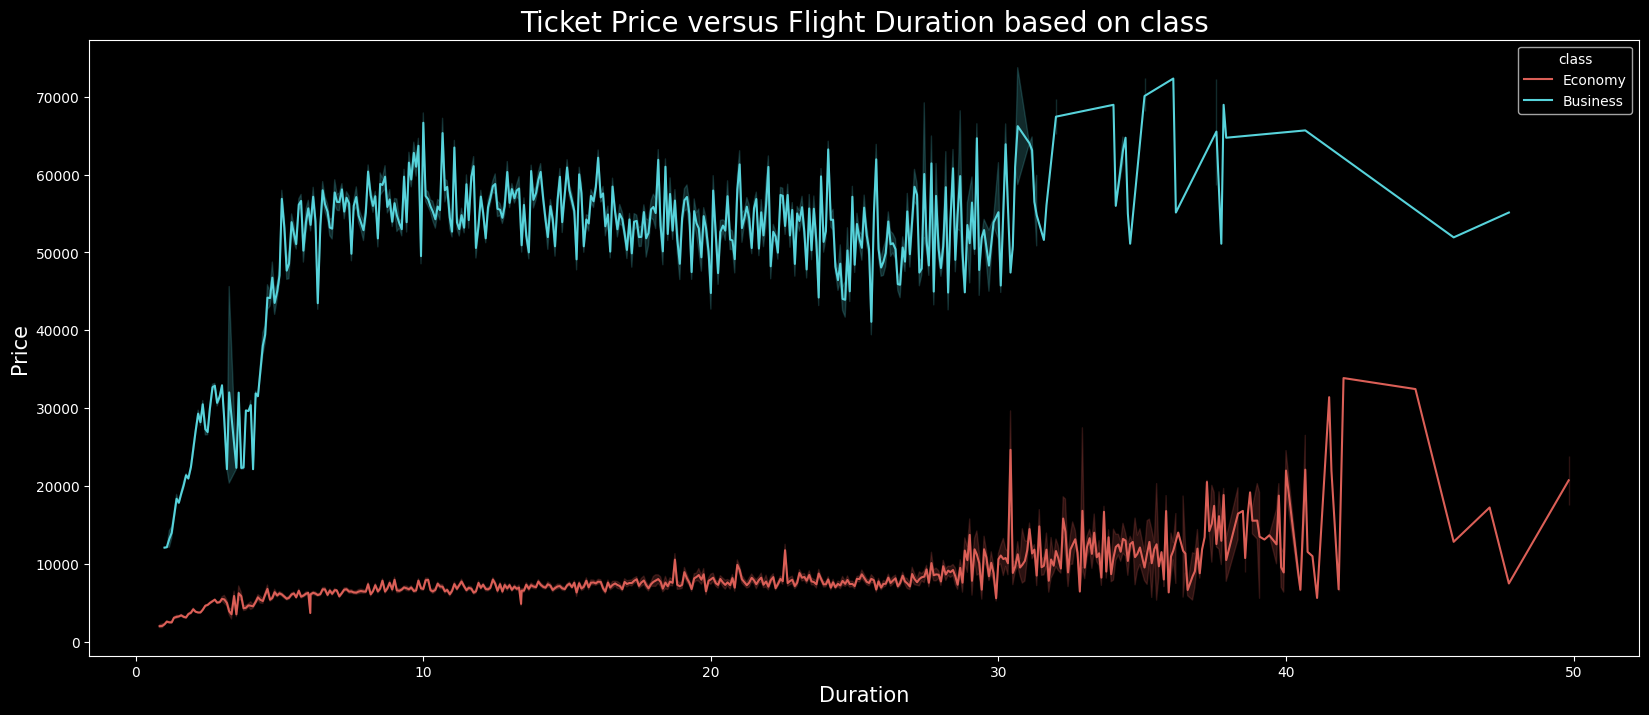

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x=df['duration'],y=df['price'],hue='class',palette='hls')
plt.title('Ticket Price versus Flight Duration based on class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

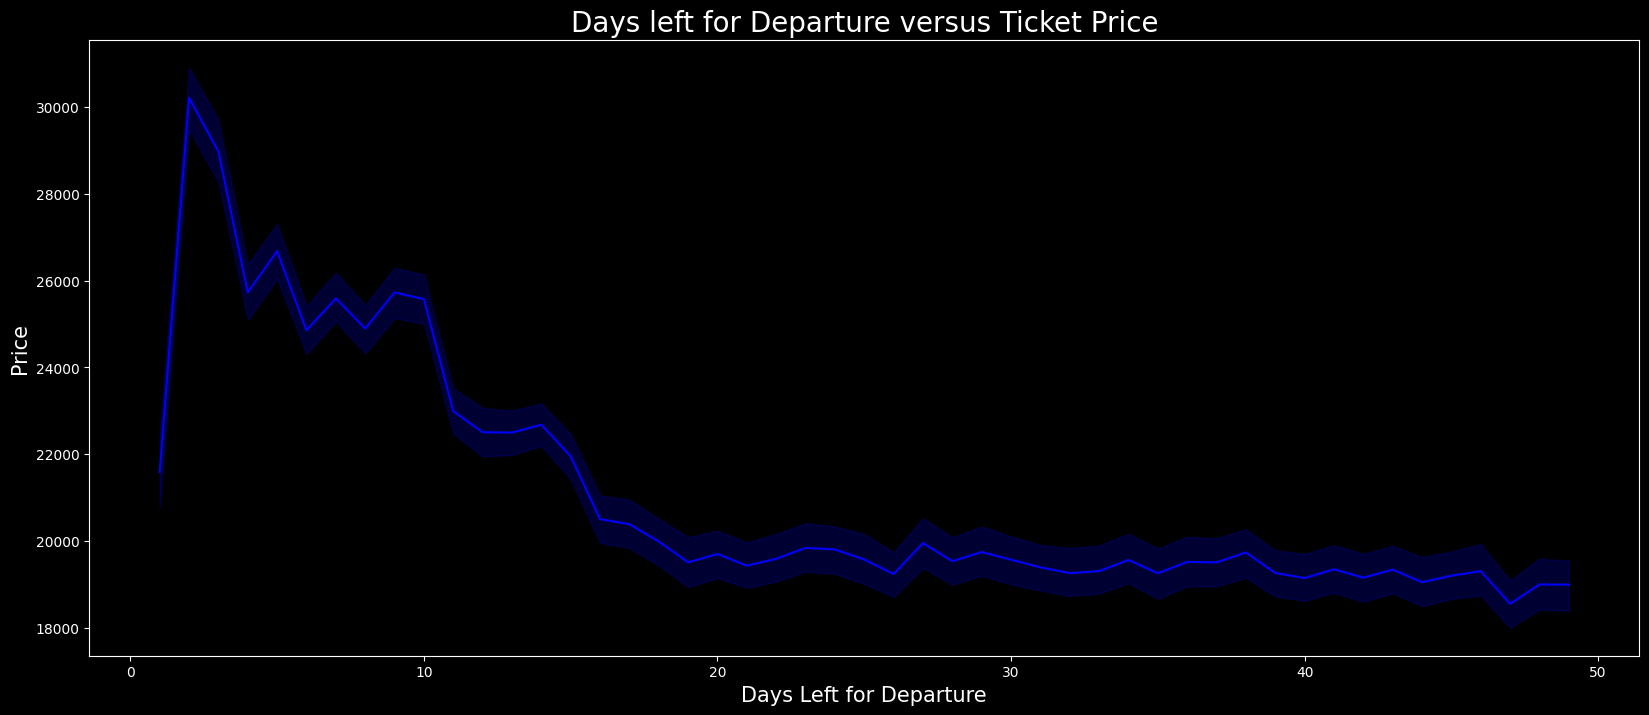

In [16]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x=df['days_left'],y=df['price'],color='blue')
plt.title('Days left for Departure versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

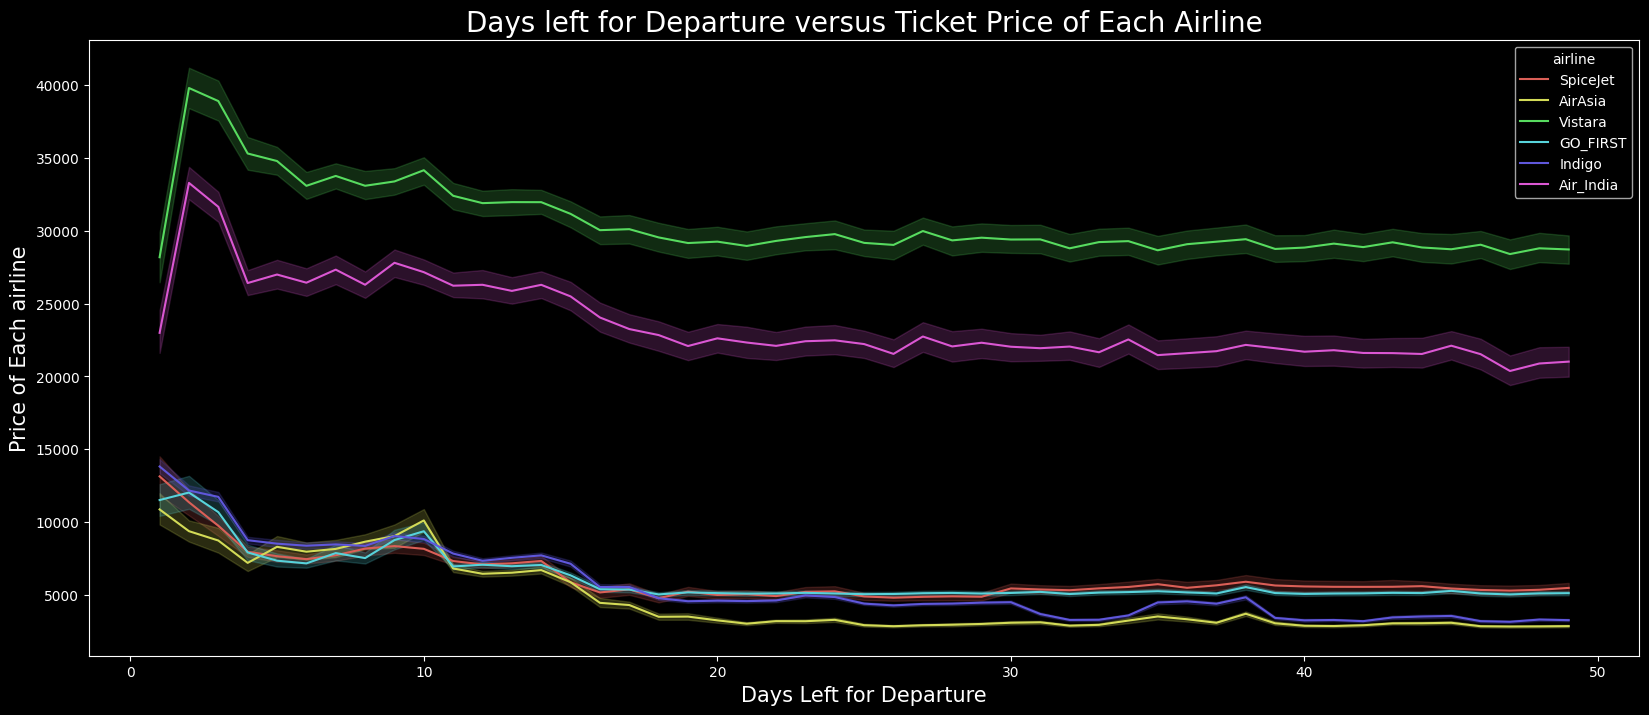

In [17]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x=df['days_left'],y=df['price'],color='blue',hue='airline',palette='hls')
plt.title('Days left for Departure versus Ticket Price of Each Airline',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price of Each airline',fontsize=15)
plt.show()

In [18]:
## Total number of flights from one city to another
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [19]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [20]:
# Creating a Back up File
df_bk=df.copy()

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [22]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['price'],axis=1)
y=df['price']

In [23]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 11), (90046, 11), (210107,), (90046,))

In [24]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [25]:
a = {'Model Name':[],'Mean_Absolute_Error_MAE':[],'Adj_R_Square':[],'Root_Mean_Squared_Error_RMSE':[],'Mean_Absolute_Percentage_Error_MAPE': [],'Mean_Squared_Error_MSE':[],'Root_Mean_Squared_Log_Error_RMSLE':[],'R2_Score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_Score


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as metrics

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

Results = pd.DataFrame(columns=['Model Name', 'Mean_Absolute_Error_MAE', 'Adj_R_Square', 'Root_Mean_Squared_Error_RMSE',
                               'Mean_Absolute_Percentage_Error_MAPE', 'Mean_Squared_Error_MSE', 'Root_Mean_Squared_Log_Error_RMSLE', 'R2_score'])

for models in MM:
    models.fit(x_train, y_train)
    y_pred = models.predict(x_test)
    print('Model Name: ', models)
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred), 3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred), 3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred), 6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 3))

    def MAPE(y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    r_squared = round(metrics.r2_score(y_test, y_pred), 6)
    adjusted_r_squared = round(1 - (1 - r_squared) * (len(y) - 1) / (len(y) - x.shape[1] - 1), 6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')

    new_row = pd.DataFrame({'Model Name': [str(models)], 'Mean_Absolute_Error_MAE': [metrics.mean_absolute_error(y_test, y_pred)],
                            'Adj_R_Square': [adjusted_r_squared], 'Root_Mean_Squared_Error_RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_pred))],
                            'Mean_Absolute_Percentage_Error_MAPE': [result], 'Mean_Squared_Error_MSE': [metrics.mean_squared_error(y_test, y_pred)],
                            'Root_Mean_Squared_Log_Error_RMSLE': [np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))],
                            'R2_score': [metrics.r2_score(y_test, y_pred)]})
    Results = pd.concat([Results, new_row], ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.541
Mean Squared Error (MSE): 49057844.123
Root Mean Squared Error (RMSE): 7004.131
R2_score: 0.90468
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904677
------------------------------------------------------------------------------------------------------------


/var/folders/ss/rmrlnxpj5tq8_tq9mvtbtyxh0000gp/T/ipykernel_21464/1499962464.py:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Results = pd.concat([Results, new_row], ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1124.313
Mean Squared Error (MSE): 12119062.735
Root Mean Squared Error (RMSE): 3481.244
R2_score: 0.976453
Root Mean Squared Log Error (RMSLE): 8.155
Mean Absolute Percentage Error (MAPE): 7.57 %
Adj R Square:  0.976452
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1063.131
Mean Squared Error (MSE): 7377954.901
Root Mean Squared Error (RMSE): 2716.239
R2_score: 0.985665
Root Mean Squared Log Error (RMSLE): 7.907
Mean Absolute Percentage Error (MAPE): 7.03 %
Adj R Square:  0.985664
------------------------------------------------------------------------------------------------------------
Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1859.249
Mean Squared Error (MSE): 14614511.207
Root Mean Squared Error (RMSE): 3822.893
R2_score: 0.971604
Root Mean Squared Log Error (RMSLE): 8.249


In [27]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4630.541170,0.904677,7004.130504,43.893081,4.905784e+07,8.854255,0.904680
1,DecisionTreeRegressor(),1124.313040,0.976452,3481.244423,7.572997,1.211906e+07,8.155145,0.976453
2,RandomForestRegressor(),1063.131438,0.985664,2716.239110,7.026495,7.377955e+06,7.907004,0.985665
3,KNeighborsRegressor(),1859.249268,0.971603,3822.893041,11.204608,1.461451e+07,8.248763,0.971604
4,ExtraTreesRegressor(),1013.145025,0.987279,2558.773337,6.647426,6.547321e+06,7.847283,0.987279
5,GradientBoostingRegressor(),2716.604669,0.959393,4571.475012,20.481521,2.089838e+07,8.427591,0.959394
6,"XGBRegressor(base_score=None, booster=None, ca...",1763.788770,0.979005,3287.105667,13.610679,1.080506e+07,8.097763,0.979006
7,BaggingRegressor(),1104.351453,0.984584,2816.634420,7.349708,7.933429e+06,7.943298,0.984585
8,Ridge(),4630.567931,0.904677,7004.127419,43.893437,4.905780e+07,8.854255,0.904680
9,Lasso(alpha=0.1),4630.427579,0.904678,7004.121108,43.890110,4.905771e+07,8.854254,0.904681


In [28]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regressor','Lasso Regressor']
result=pd.DataFrame({'Model_name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.987279,1013.145025,2558.773337,6.647426,6.547321e+06,7.847283,0.987279
1,RandomForestRegressor,0.985664,1063.131438,2716.239110,7.026495,7.377955e+06,7.907004,0.985665
2,BaggingRegressor,0.984584,1104.351453,2816.634420,7.349708,7.933429e+06,7.943298,0.984585
3,XGBRegressor,0.979005,1763.788770,3287.105667,13.610679,1.080506e+07,8.097763,0.979006
4,DecisionTreeRegressor,0.976452,1124.313040,3481.244423,7.572997,1.211906e+07,8.155145,0.976453
5,KNeighborsRegressor,0.971603,1859.249268,3822.893041,11.204608,1.461451e+07,8.248763,0.971604
6,GradientBoostingRegressor,0.959393,2716.604669,4571.475012,20.481521,2.089838e+07,8.427591,0.959394
7,Lasso Regressor,0.904678,4630.427579,7004.121108,43.890110,4.905771e+07,8.854254,0.904681
8,LinearRegression,0.904677,4630.541170,7004.130504,43.893081,4.905784e+07,8.854255,0.904680
9,Ridge Regressor,0.904677,4630.567931,7004.127419,43.893437,4.905780e+07,8.854255,0.904680


In [29]:
modelETR.fit(x_train,y_train)
y_pred=modelETR.predict(x_test)

In [30]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [31]:
result.sample(10)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
219366,219366,Air_India,AI-423,Delhi,Early_Morning,one,Night,Hyderabad,Business,16.42,6,47408,47408,46821.84
11010,11010,Vistara,UK-933,Delhi,Afternoon,one,Night,Bangalore,Economy,7.33,7,10680,10680,10680.00
166975,166975,Vistara,UK-898,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,1.17,17,1776,1776,1910.07
248532,248532,Vistara,UK-864,Bangalore,Evening,one,Morning,Delhi,Business,13.58,48,50361,50361,51912.11
173189,173189,AirAsia,I5-1543,Hyderabad,Afternoon,one,Late_Night,Kolkata,Economy,11.25,24,2613,2613,2344.04
85152,85152,Vistara,UK-808,Bangalore,Early_Morning,zero,Morning,Delhi,Economy,2.67,8,7489,7489,7484.33
230512,230512,Vistara,UK-958,Mumbai,Afternoon,one,Night,Bangalore,Business,10.92,8,54608,54608,56162.56
116386,116386,Air_India,AI-610,Bangalore,Evening,one,Evening,Chennai,Economy,21.08,12,12949,12949,11844.46
60218,60218,GO_FIRST,G8-2508,Mumbai,Night,one,Morning,Bangalore,Economy,8.92,42,6319,6319,6303.79
74193,74193,GO_FIRST,G8-347,Mumbai,Early_Morning,one,Evening,Hyderabad,Economy,12.08,28,11445,11445,7045.55


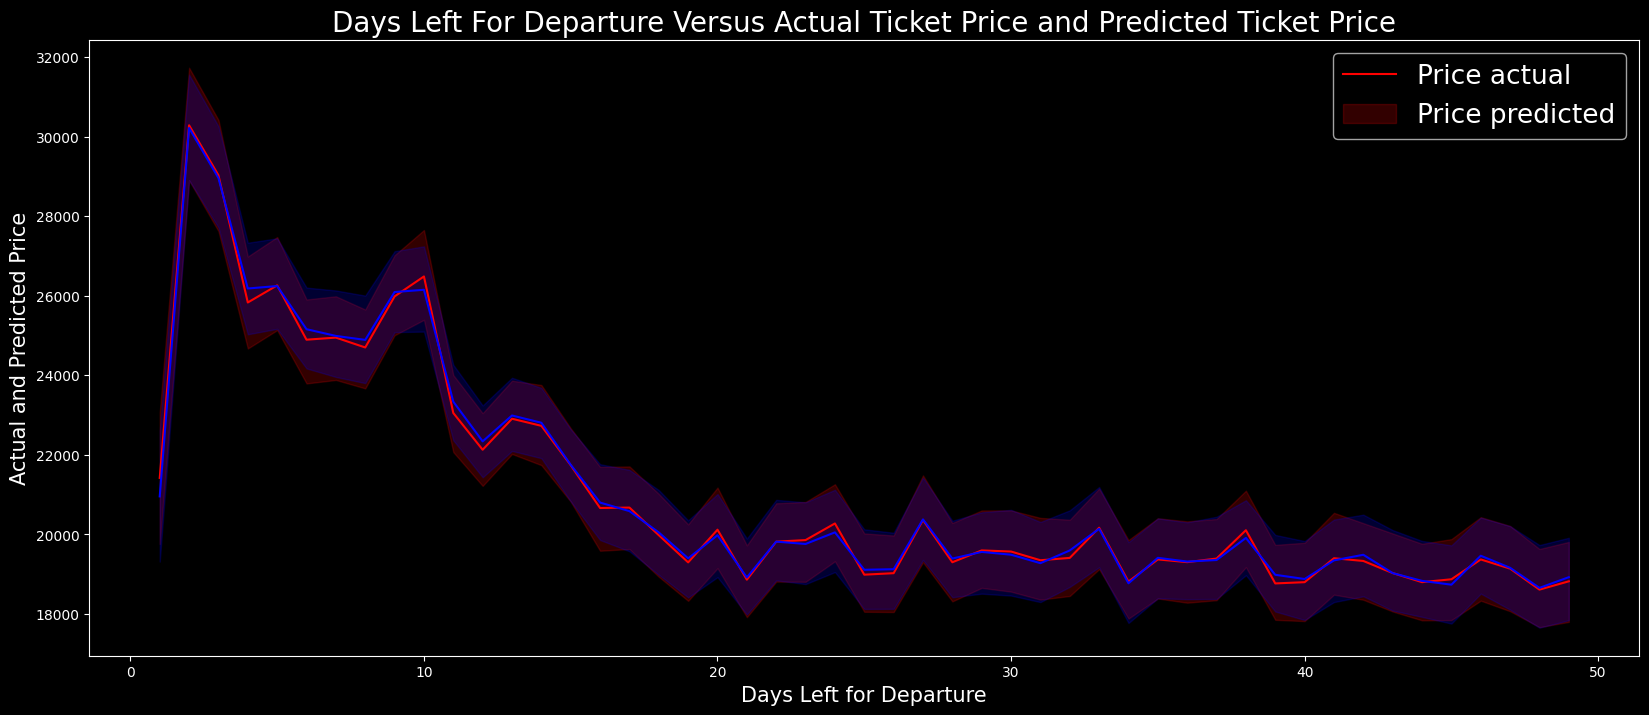

In [32]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

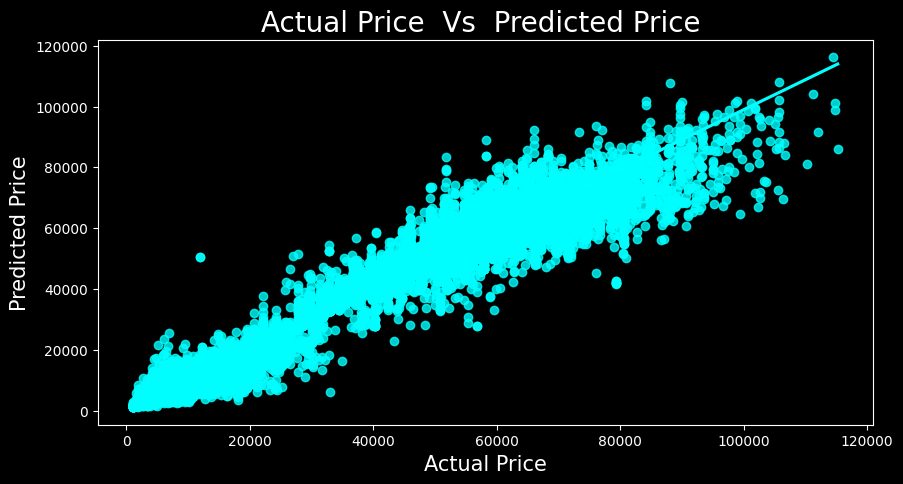

In [33]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()